In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from matplotlib.patches import ConnectionPatch
import scipy.spatial.distance as dist

In [2]:
def dp(dist_mat):
    """
    Find minimum-cost path through matrix `dist_mat` using dynamic programming.

    The cost of a path is defined as the sum of the matrix entries on that
    path. See the following for details of the algorithm:

    - http://en.wikipedia.org/wiki/Dynamic_time_warping
    - https://www.ee.columbia.edu/~dpwe/resources/matlab/dtw/dp.m

    The notation in the first reference was followed, while Dan Ellis's code
    (second reference) was used to check for correctness. Returns a list of
    path indices and the cost matrix.
    """

    N, M = dist_mat.shape
    
    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

In [3]:
data = pd.read_csv('traks.csv', sep = ';')

In [4]:
data

,track,time,x,y
0,1,10:32:13,1598,526
1,1,10:32:14,1524,544
2,1,10:32:15,1441,557
3,1,10:32:16,1357,392
4,1,10:32:17,1395,573
...,...,...,...,...
109,4,10:42:09,432,689
110,4,10:42:10,450,736
111,4,10:42:11,503,754
112,4,10:42:12,1620,924


In [5]:
data['distance'] = abs(data['x']-data['y'])

In [6]:
data

,track,time,x,y,distance
0,1,10:32:13,1598,526,1072
1,1,10:32:14,1524,544,980
2,1,10:32:15,1441,557,884
3,1,10:32:16,1357,392,965
4,1,10:32:17,1395,573,822
...,...,...,...,...,...
109,4,10:42:09,432,689,257
110,4,10:42:10,450,736,286
111,4,10:42:11,503,754,251
112,4,10:42:12,1620,924,696


In [7]:
P1=data.loc[data["track"]==1]
P1

,track,time,x,y,distance
0,1,10:32:13,1598,526,1072
1,1,10:32:14,1524,544,980
2,1,10:32:15,1441,557,884
3,1,10:32:16,1357,392,965
4,1,10:32:17,1395,573,822
5,1,10:32:18,1352,409,943
6,1,10:32:19,1415,573,842
7,1,10:32:20,1358,379,979
8,1,10:32:21,1424,557,867
9,1,10:32:22,1319,574,745


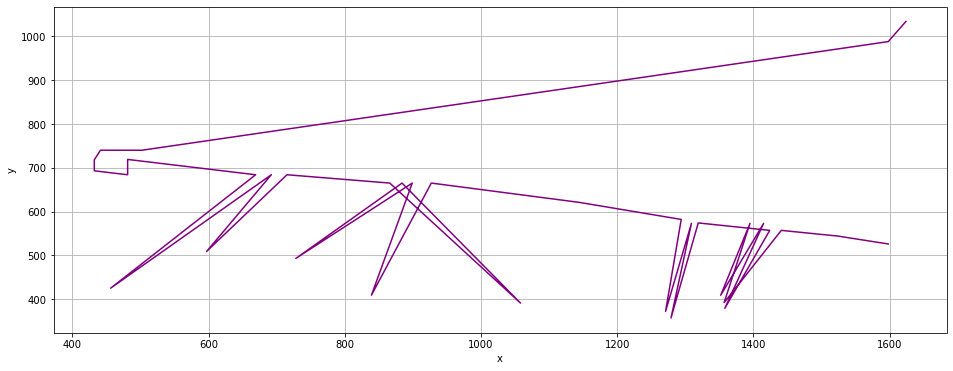

In [8]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.plot(P1['x'], P1['y'],c='purple')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [9]:
P2=data.loc[data["track"]==2]
P2

,track,time,x,y,distance
35,2,10:35:17,1588,498,1090
36,2,10:35:18,1438,530,908
37,2,10:35:19,1286,556,730
38,2,10:35:20,1274,325,949
39,2,10:35:21,1280,556,724
40,2,10:35:22,1264,334,930
41,2,10:35:23,1274,556,718
42,2,10:35:24,1109,595,514
43,2,10:35:25,919,637,282
44,2,10:35:26,835,375,460


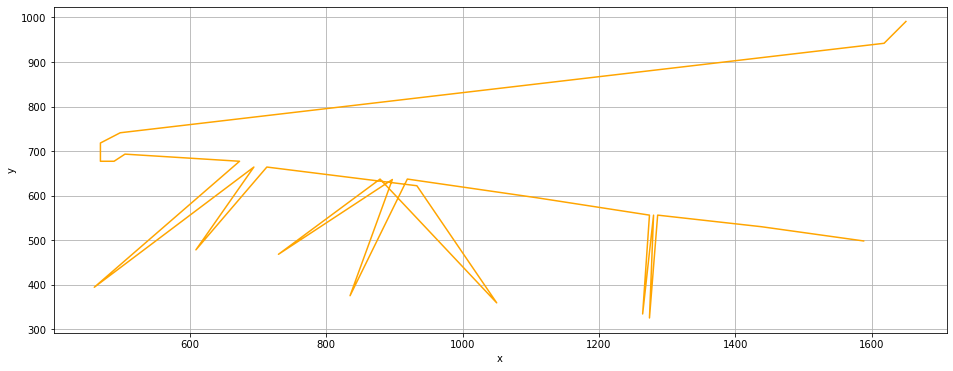

In [10]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.plot(P2['x'], P2['y'],c='orange')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [11]:
P3=data.loc[data["track"]==3]
P3

,track,time,x,y,distance
62,3,10:39:03,1584,495,1089
63,3,10:39:04,1394,531,863
64,3,10:39:05,1365,380,985
65,3,10:39:06,1404,539,865
66,3,10:39:07,1356,386,970
67,3,10:39:08,1390,542,848
68,3,10:39:09,1346,373,973
69,3,10:39:10,1378,538,840
70,3,10:39:11,1288,556,732
71,3,10:39:12,1290,378,912


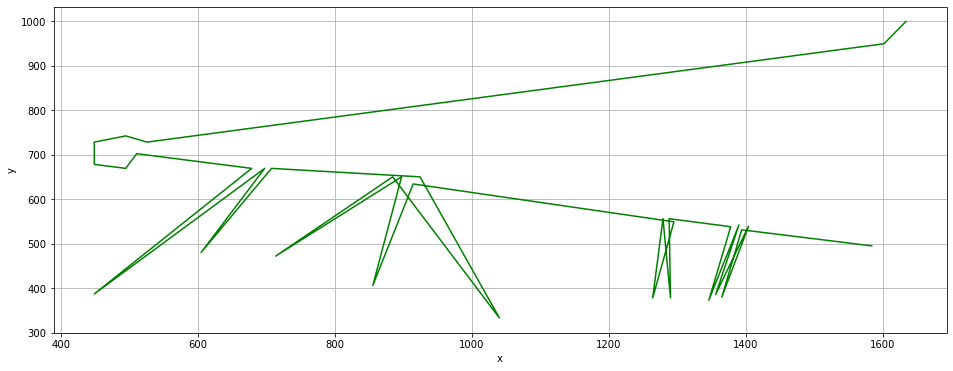

In [12]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.plot(P3['x'], P3['y'],c='green')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [13]:
P4=data.loc[data["track"]==4]
P4

,track,time,x,y,distance
95,4,10:41:55,1609,515,1094
96,4,10:41:56,1425,554,871
97,4,10:41:57,1302,579,723
98,4,10:41:58,1535,541,994
99,4,10:41:59,1662,474,1188
100,4,10:42:00,1266,579,687
101,4,10:42:01,1103,579,524
102,4,10:42:02,819,633,186
103,4,10:42:03,855,362,493
104,4,10:42:04,835,644,191


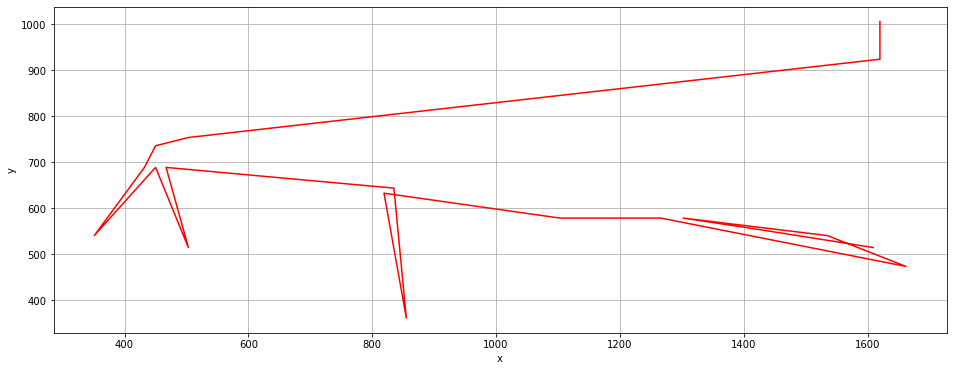

In [14]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.plot(P4['x'], P4['y'],c='red')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

# 1.

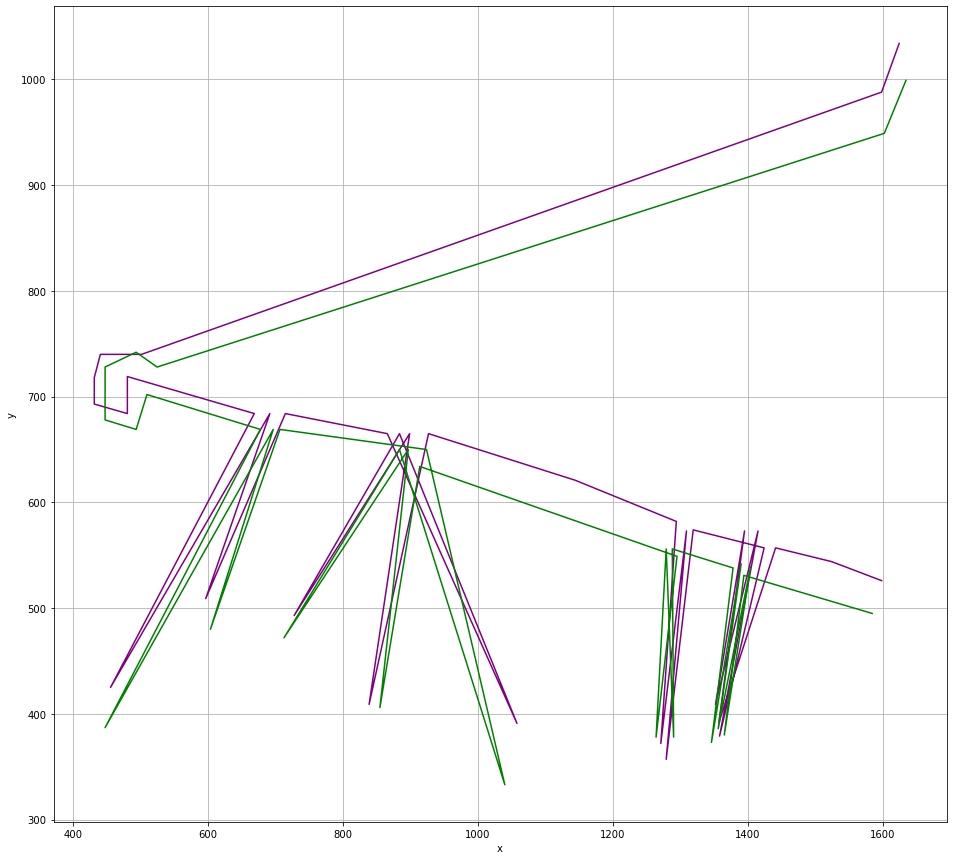

In [15]:
plt.figure(figsize=(16,15))
plt.grid(True)
plt.plot(P1['x'], P1['y'],c='purple')
plt.plot(P3['x'], P3['y'],c='green')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [16]:
p1=np.array(P1['distance'])
p1

array([1072,  980,  884,  965,  822,  943,  842,  979,  867,  745,  922,
        736,  899,  712,  523,  262,  430,  234,  235,  219,  667,  201,
         31,   88,    8,   31,   15,  238,  203,  261,  286,  299,  238,
        610,  590], dtype=int64)

In [17]:
p2=np.array(P2['distance'])
p2

array([1090,  908,  730,  949,  724,  930,  718,  514,  282,  460,  261,
        262,  242,  691,  311,   49,  131,   30,   66,    4,  188,  188,
        208,  249,  243,  676,  659], dtype=int64)

In [18]:
p3=np.array(P3['distance'])
p3

array([1089,  863,  985,  865,  970,  848,  973,  840,  732,  912,  723,
        886,  746,  280,  449,  247,  241,  234,  707,  274,   38,  124,
         28,   61,    9,  192,  175,  230,  280,  248,  203,  653,  635],
      dtype=int64)

In [19]:
p4=np.array(P4['distance'])
p4

array([1094,  871,  723,  994, 1188,  687,  524,  186,  493,  191,  222,
         12,  239,  190,  257,  286,  251,  696,  614], dtype=int64)

(-1.7000000000000002, 35.7, -596.05, 1693.05)

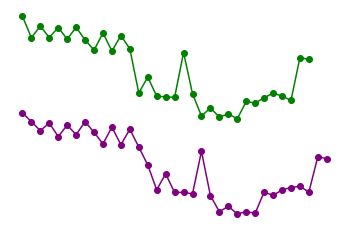

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(np.arange(p3.shape[0]), p3 + 500, "-o", c="green")
plt.plot(np.arange(p1.shape[0]), p1 - 500, "-o", c="purple")
plt.axis("off")

In [21]:
# Distance matrix
N = p3.shape[0]
M = p1.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(p3[i] - p1[j])

Alignment cost: 1128.0000
Normalized alignment cost: 16.5882


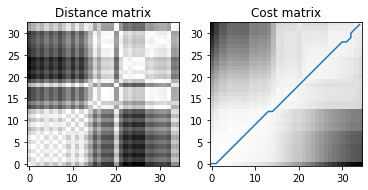

In [22]:
# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

plt.figure(figsize=(6, 4))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

(-1.7000000000000002, 35.7, -596.05, 1693.05)

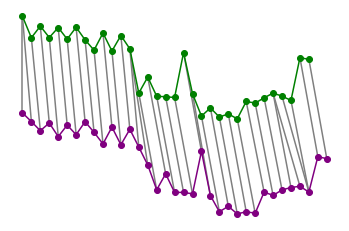

In [23]:
plt.figure()
for p3_i, p1_j in path:
    plt.plot([p3_i, p1_j], [p3[p3_i] + 500, p1[p1_j] - 500], c="C7")
plt.plot(np.arange(p3.shape[0]), p3 + 500, "-o", c="green")
plt.plot(np.arange(p1.shape[0]), p1 - 500, "-o", c="purple")
plt.axis("off")

# 2.

(-1.7000000000000002, 35.7, -596.1, 1694.1)

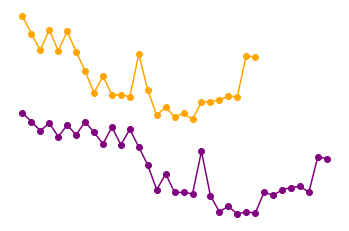

In [24]:
plt.figure(figsize=(6, 4))
plt.plot(np.arange(p2.shape[0]), p2 + 500, "-o", c="orange")
plt.plot(np.arange(p1.shape[0]), p1 - 500, "-o", c="purple")
plt.axis("off")

In [25]:
# Distance matrix
N = p2.shape[0]
M = p1.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(p2[i] - p1[j])

Alignment cost: 1269.0000
Normalized alignment cost: 20.4677


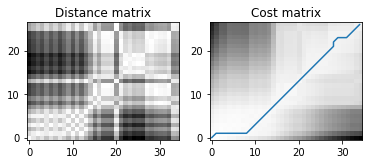

In [26]:
# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

plt.figure(figsize=(6, 4))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

(-1.7000000000000002, 35.7, -596.1, 1694.1)

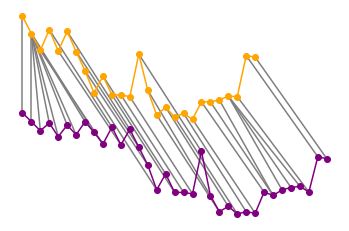

In [27]:
plt.figure()
for p2_i, p1_j in path:
    plt.plot([p2_i, p1_j], [p2[p2_i] + 500, p1[p1_j] - 500], c="C7")
plt.plot(np.arange(p2.shape[0]), p2 + 500, "-o", c="orange")
plt.plot(np.arange(p1.shape[0]), p1 - 500, "-o", c="purple")
plt.axis("off")

# 3.

Alignment cost: 1866.0000
Normalized alignment cost: 40.5652

Alignment cost: 2285.0000
Normalized alignment cost: 43.9423

Alignment cost: 2030.0000
Normalized alignment cost: 37.5926



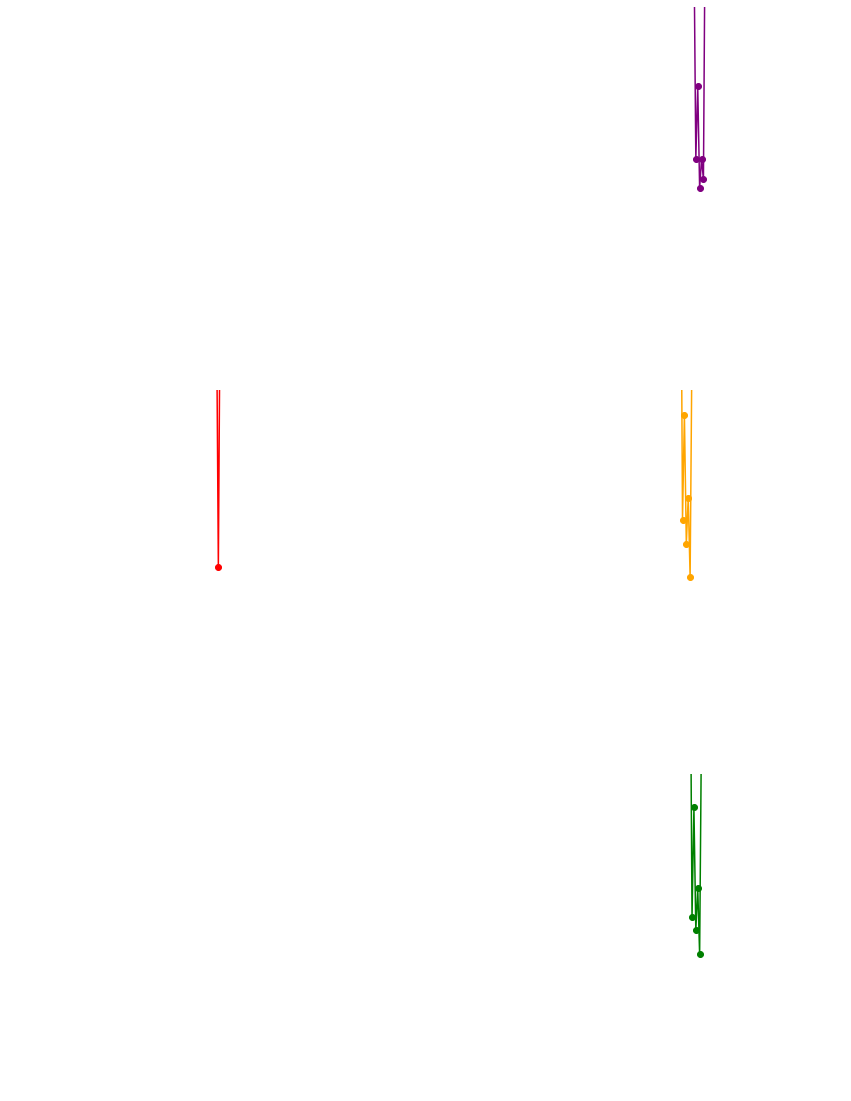

In [60]:
fig = plt.figure(figsize=(15, 20))
ax1 = fig.add_subplot(323)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(326)
# fig = plt.figure(figsize=(6, 8))
ax1.plot(np.arange(p4.shape[0]), p4, "-o", c="red")
ax2.plot(np.arange(p1.shape[0]), p1, "-o", c="purple")
ax3.plot(np.arange(p2.shape[0]), p2, "-o", c="orange")
ax4.plot(np.arange(p3.shape[0]), p3, "-o", c="green")
for ax in [ax1, ax2, ax3, ax4]:
    ax.axis("off")
    ax.set_xlim([-100, 100])
    ax.set_ylim([-100, 150])
    
for cur_p in [p2, p3, p1]:

    # Distance matrix
    N = p4.shape[0]
    M = cur_p.shape[0]
    dist_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
    #         print(a[i], b[j], abs(a[i] - b[j]))
            dist_mat[i, j] = abs(p4[i] - cur_p[j])

    # DTW
    path, cost_mat = dp(dist_mat)
    print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
    print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))
    print()